In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [370]:
df = pd.read_csv('Iris.csv')

In [371]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [372]:
df.shape

(150, 6)

In [373]:
df.drop('Id',axis=1,inplace=True)

In [374]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [376]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [377]:
df.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### Data Visualization

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

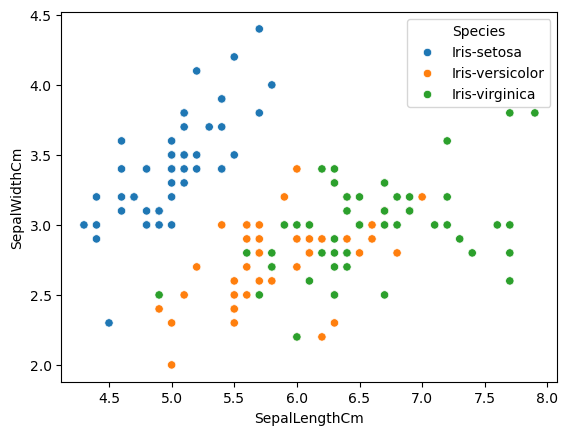

In [379]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

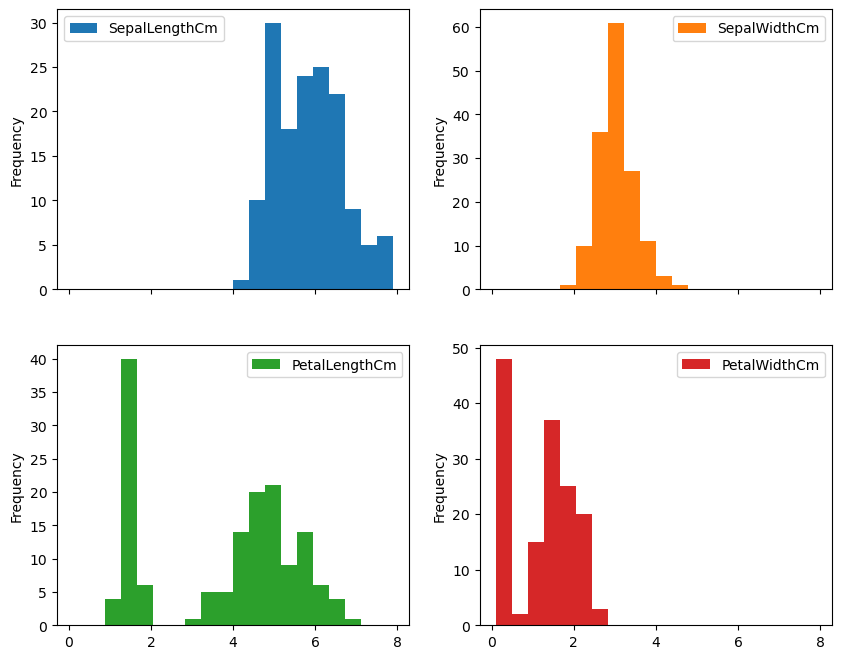

In [380]:
df.plot.hist(subplots=True, layout=(2,2), figsize=(10,8), bins=20)
plt.show()

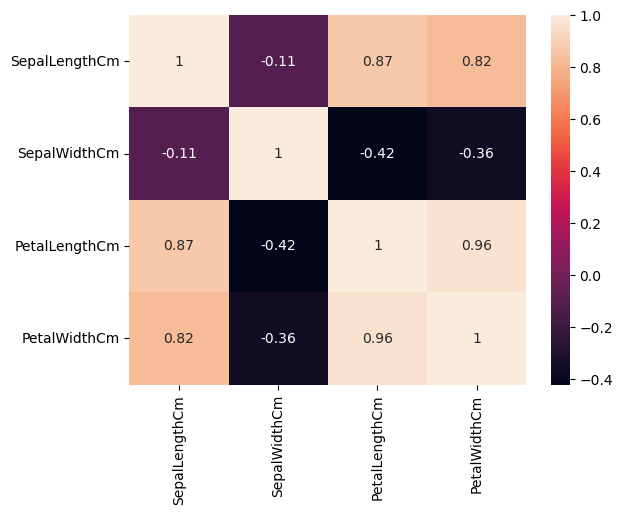

In [381]:
sns.heatmap(df.drop('Species',axis=1).corr(), annot=True)
plt.show()

### Model Training

* Preprocessing Part

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [385]:
X = df.drop('Species', axis=1)
y = df['Species']

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [387]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [388]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [389]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [390]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

* KNN Classification

In [392]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)

* Decision Tree Classification

In [394]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)

* Support Vector Machine Classification

In [396]:
from sklearn.svm import SVC
model3 = SVC(kernel='rbf', random_state=0, C=1.0, gamma=0.10)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)

* Logistic Regression Classification

In [398]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
acc4 = accuracy_score(y_test, y_pred4)

* Cross-validation Score

In [400]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1, X, y, cv=5)
scores2 = cross_val_score(model2, X, y, cv=5)
scores3 = cross_val_score(model3, X, y, cv=5)
scores4 = cross_val_score(model4, X, y, cv=5)

In [401]:
result = pd.DataFrame(
    {'Score': [scores1.mean(), scores2.mean(), scores3.mean(), scores4.mean()]},
    index=['KNN', 'DecisionTree', 'SVC', 'LogRegression']
)

In [402]:
result

,Score
KNN,0.973333
DecisionTree,0.966667
SVC,0.980000
LogRegression,0.973333
